# param_estim_4lump.py

# SAADBIN KHAN
 
## Computational Assignment 4 (4 Lump Model)
 
## Inputs
A set of weight fraction data 'y' with varying time (t)

## Outputs
Estimation of parameters 'k' (k_12,k_13,k_14,k_23,k_24)
 
## The system to be solved: 

$\frac{dy_1}{dt}=-(k_{12}+k_{13}+k_{14}y_{1}^{2}$

$\frac{dy_2}{dt}=k_{12}y_{1}^{2}-k_{23}y_{2}-k_{24}y_{2}$

$\frac{dy_3}{dt}=k_{13}y_{1}^{2}-k_{23}y_{2}$

$\frac{dy_4}{dt}=k_{14}y_{1}^{2}-k_{24}y_{2}$
 
 ## The PYTHON Script:

k_12 =  34.5727846136
k_13 =  8.81035236169
k_14 =  2.91883960707
k_23 =  1.32078589628
k_24 =  0.481406055515


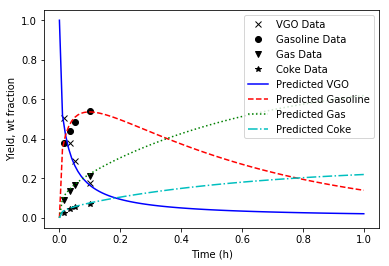

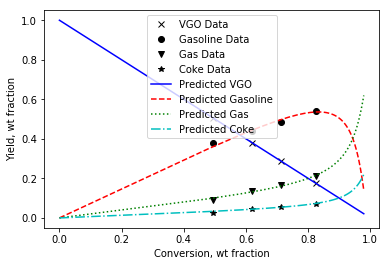

In [2]:
# COMPUTATIONAL ASSIGNMENT 4
# SAADBIN KHAN

import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
#import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.pyplot as plt

t = [1/60, 1/30, 1/20, 1/10] # Time (h)

ytable = np.array([[0.5074, 0.3796, 0.2882, 0.1762], [0.3767, 0.4385, 0.4865, 0.5416], [.0885, .136, .1681, .2108], [.0274, .0459, .0572, .0714]]) # Available y data
nlump = 4
ndat = len(ytable[0,:]) # Number of sample
y = np.zeros([nlump,ndat])  
y[0,:] = ytable[0,:] # VGO
y[1,:] = ytable[1,:] # Gasoline
y[2,:] = ytable[2,:] # Gas
y[3,:] = ytable[3,:] # Coke

convinit = 1-y[0,:] # Initial Conversion

kinit = np.array([0.0, 0.0, 0.0, 0.0, 0.0]) # Initial Guess for k paramters
y0 =[1.0, 0.0, 0.0, 0.0] # Initial y values


# Function where the system of ODE is defined
def ODEdef(y,time,k):

    dydt = np.zeros([nlump])
    k_12 = k[0]
    k_13 = k[1]
    k_14 = k[2]
    k_23 = k[3]
    k_24 = k[4]
    dydt[0] = -(k_12+k_13+k_14)*y[0]**2
    dydt[1] = k_12*y[0]**2-k_23*y[1]-k_24*y[1]
    dydt[2] = k_13*y[0]**2+k_23*y[1]
    dydt[3] = k_14*y[0]**2+k_24*y[1]
    dydt = np.array(dydt.T)
    #return dydt
    return dydt.ravel()


# Function to solve the ODE sytem
def ODEsolve(t,*k):

    y0 =[1.0, 0.0, 0.0, 0.0]
    yout = np.zeros([len(t),nlump])
    for i in range(len(t)):
        tspan = np.arange(0,t[i]+0.01,0.01)
        yseries = odeint(ODEdef,y0,tspan,args=(k,))
        yout[i,:] = yseries[-1,:]
    yout=np.array(yout.T)
    #y_output=np.array(y_output)      
    return yout.ravel()
    #return yout
k, resnorm = curve_fit(ODEsolve,t,y.ravel(),p0=kinit)
print('k_12 = ',k[0])
print('k_13 = ',k[1])
print('k_14 = ',k[2])
print('k_23 = ',k[3])
print('k_24 = ',k[4])
tplot = np.linspace(0,1,100) # Plotting Timespan
y_calc = ODEsolve(tplot,*k) # Calculated y at Plotting Timespan
y_calc = np.reshape(y_calc,(nlump,len(tplot)))
conv = 1-y_calc[0,:] # Final Conversion


# Plotting Starts Here

plt.figure(1)
plt.plot(t,y[0,:],'xk')
plt.plot(t,y[1,:],'ok')
plt.plot(t,y[2,:],'vk')
plt.plot(t,y[3,:],'*k')
plt.plot(tplot,y_calc[0,:],'b-', linewidth=1.5)
plt.plot(tplot,y_calc[1,:],'r--',linewidth=1.5)
plt.plot(tplot,y_calc[2,:],'g:', linewidth=1.5)
plt.plot(tplot,y_calc[3,:],'c-.', linewidth=1.5)
plt.xlabel('Time (h)')
plt.ylabel('Yield, wt fraction')
plt.legend(['VGO Data','Gasoline Data','Gas Data','Coke Data','Predicted VGO','Predicted Gasoline','Predicted Gas','Predicted Coke'],loc='upper right')
plt.show()
#plt.savefig('3lump_fig1.png')


plt.figure(2)
plt.plot(convinit,y[0,:],'xk')
plt.plot(convinit,y[1,:],'ok')
plt.plot(convinit,y[2,:],'vk')
plt.plot(convinit,y[3,:],'*k')
plt.plot(conv,y_calc[0,:],'b-', linewidth=1.5)
plt.plot(conv,y_calc[1,:],'r--',linewidth=1.5)
plt.plot(conv,y_calc[2,:],'g:', linewidth=1.5)
plt.plot(conv,y_calc[3,:],'c-.', linewidth=1.5)
plt.xlabel('Conversion, wt fraction')
plt.ylabel('Yield, wt fraction')
plt.legend(['VGO Data','Gasoline Data','Gas Data','Coke Data','Predicted VGO','Predicted Gasoline','Predicted Gas','Predicted Coke'],loc='upper center')
plt.show()
#plt.savefig('3lump_fig2.png')

Figure 1: Data and Fitted Curve with respect to Time


Figure 2: Data and Fitted Curve Solution for 4 Lump Model